# Modelo K Vecinos mas cercanos


## Importación de librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obtencion de los datos estandarizados

Se leera el archivo CSV que contiene el conjunto de datos de masas mamograficas.

In [2]:
mammographic_masses_standard = pd.read_csv("mammographic_masses_standard.csv")

In [3]:
mammographic_masses_standard.head(10)

,Age,Shape,Margin,Density,Severity
0,0.765804,0.174460,1.395631,0.240313,1
1,0.151666,0.979883,1.395631,0.240313,1
2,-1.895458,-1.436386,-1.158927,0.240313,0
3,0.083429,-1.436386,1.395631,0.240313,1
4,1.379941,-1.436386,0.756992,0.240313,1
5,-0.940133,-0.630963,-1.158927,0.240313,1
6,-1.349558,0.174460,-1.158927,-2.612545,0
7,0.288141,-0.630963,-1.158927,-2.612545,0
8,-0.121284,-1.436386,-1.158927,0.240313,0
9,-0.257759,0.174460,0.756992,0.240313,0


## División en conjunto de entrenamiento y prueba


In [4]:
df_feat = mammographic_masses_standard.drop('Severity', axis = 1)
df_feat.head()

,Age,Shape,Margin,Density
0,0.765804,0.174460,1.395631,0.240313
1,0.151666,0.979883,1.395631,0.240313
2,-1.895458,-1.436386,-1.158927,0.240313
3,0.083429,-1.436386,1.395631,0.240313
4,1.379941,-1.436386,0.756992,0.240313


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_feat,mammographic_masses_standard['Severity'],
                                                   test_size=0.25, random_state=42)

## Uso de KNN (K vecinos más cercanos)
 Comenzando con k = 1.


In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=1)

In [9]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [10]:
pred = knn.predict(X_test)

## Predicciones y Evaluaciones

Evaluando el modelo KNN

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

### Matriz de confución

In [12]:
print(confusion_matrix(y_test,pred))

[[72 34]
 [26 76]]


### Informe de clasificación

In [13]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.73      0.68      0.71       106
           1       0.69      0.75      0.72       102

   micro avg       0.71      0.71      0.71       208
   macro avg       0.71      0.71      0.71       208
weighted avg       0.71      0.71      0.71       208



## Elección del valor de K

Usando el método del codo para elegir un buen valor de K:

In [14]:
#Forma en la que se calcula el error
pron=[0,1,0,1,0]
real=[0,1,0,1,1]
c=np.mean(np.array(pron) != np.array(real))
print(c)

0.2


In [15]:
tasa_error = []

# Tomará algún tiempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    tasa_error.append(np.mean(pred_i != y_test))

**Gráfica usando la información del bucle for.**

Text(0, 0.5, 'Tasa de Error')

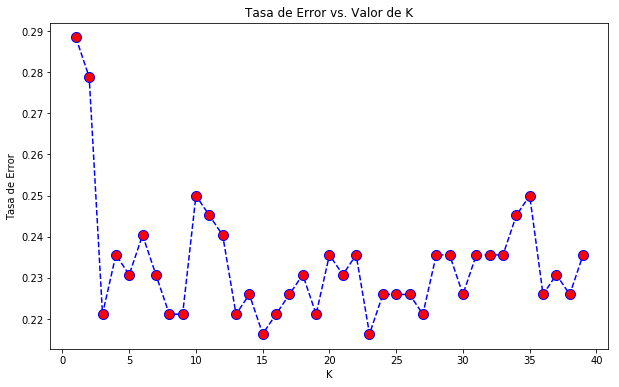

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),tasa_error,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Tasa de Error vs. Valor de K')
plt.xlabel('K')
plt.ylabel('Tasa de Error')

## Reentrenando el modelo con un nuevo valor K


In [17]:
# CON K=25 
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('***************Informe de Clasificación**************\n')
print(classification_report(y_test,pred))

CON K=25


[[71 35]
 [12 90]]


***************Informe de Clasificación**************

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       106
           1       0.72      0.88      0.79       102

   micro avg       0.77      0.77      0.77       208
   macro avg       0.79      0.78      0.77       208
weighted avg       0.79      0.77      0.77       208



In [18]:
# AHORA CON K=10
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('CON K=10')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print('***************Informe de Clasificación**************\n')
print(classification_report(y_test,pred))

CON K=10


[[79 27]
 [25 77]]


***************Informe de Clasificación**************

              precision    recall  f1-score   support

           0       0.76      0.75      0.75       106
           1       0.74      0.75      0.75       102

   micro avg       0.75      0.75      0.75       208
   macro avg       0.75      0.75      0.75       208
weighted avg       0.75      0.75      0.75       208

